In [5]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import subfunc as sf
from tqdm import tqdm
import pickle
import  matplotlib.pyplot as plt

In [2]:
DATA_PATH = 'data/'
X_train = pd.read_csv(f'{DATA_PATH}X_train.csv',sep='\t', index_col='index')
X_test = pd.read_csv(f'{DATA_PATH}X_test.csv', sep='\t', index_col='index')
y_train = pd.read_csv(f'{DATA_PATH}y_train.csv',sep='\t', index_col='index')
y_test = pd.read_csv(f'{DATA_PATH}y_test.csv',sep='\t', index_col='index')

In [3]:
target_columns = y_train.columns
X_train_dataset, X_test_dataset, y_train_dataset, y_test_dataset = \
    sf.select_target(X_train, X_test, y_train, y_test)
del X_train, X_test, y_train, y_test


In [4]:
np.random.seed(42)
models = {}
for target in tqdm(target_columns):
    best_score = 0
    best_model = None
    for n_estimators in np.arange(200, 350, 50):
        for lr in np.arange(0.001, 0.1, 0.005):
            mult_model  = GradientBoostingRegressor(
                n_estimators=n_estimators,
                learning_rate=lr)
            mult_model.fit(X_train_dataset[target], y_train_dataset[target])
            cur_score = r2_score(y_test_dataset[target], mult_model.predict(X_test_dataset[target]))

            if cur_score > best_score:
                best_score = cur_score
                best_model = mult_model
                print(f'{target} : {best_score}')
    models[target] = best_model


100%|██████████| 4/4 [21:23<00:00, 320.82s/it]


химшлак последний Al2O3 : 0.16115686920174987
химшлак последний Al2O3 : 0.4804950652625447
химшлак последний Al2O3 : 0.553853688502368
химшлак последний Al2O3 : 0.5748780766305612
химшлак последний Al2O3 : 0.5826936674451682
химшлак последний Al2O3 : 0.5857925273033695
химшлак последний Al2O3 : 0.5891209832592648
химшлак последний Al2O3 : 0.5894523959280686
химшлак последний Al2O3 : 0.5899178847740276
химшлак последний Al2O3 : 0.5949882788360354
химшлак последний Al2O3 : 0.5962414407493948
химшлак последний CaO : 0.172726452809573
химшлак последний CaO : 0.6102873186529713
химшлак последний CaO : 0.7728706607554062
химшлак последний CaO : 0.8476493329842226
химшлак последний CaO : 0.8815939457484224
химшлак последний CaO : 0.8995673888811753
химшлак последний CaO : 0.908209480703926
химшлак последний CaO : 0.9118949009287083
химшлак последний CaO : 0.9157185325365185
химшлак последний CaO : 0.917336285289114
химшлак последний CaO : 0.9180677341817123
химшлак последний CaO : 0.918737627

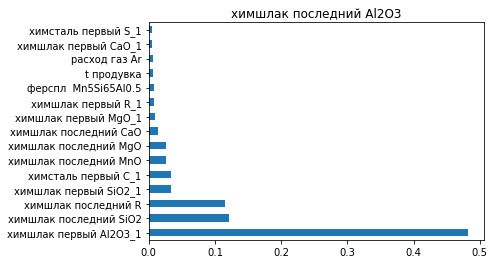

In [8]:
for target in [target_columns[0]]:
    sf.plot_feature_importance(models[target], X_train_dataset[target], target)

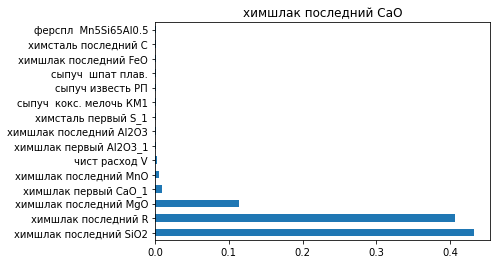

In [9]:
for target in [target_columns[1]]:
    sf.plot_feature_importance(models[target], X_train_dataset[target], target)


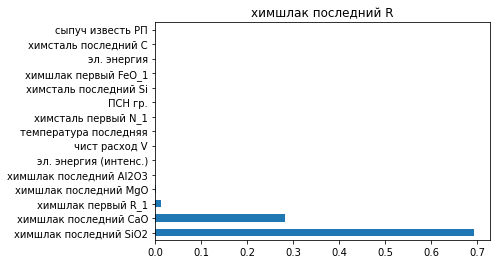

In [10]:
for target in [target_columns[2]]:
    sf.plot_feature_importance(models[target], X_train_dataset[target], target)


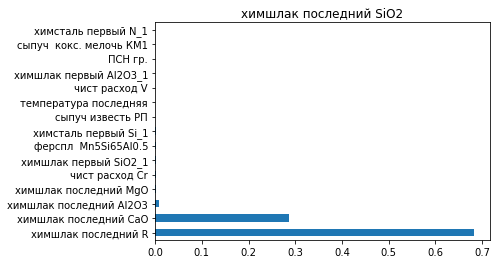

In [11]:
for target in [target_columns[3]]:
    sf.plot_feature_importance(models[target], X_train_dataset[target], target)

In [12]:
for target in [target_columns[3]]:
    predict = models[target].predict(X_test_dataset[target])
    sf.show_result(predict, y_test_dataset[target])

AttributeError: 'Series' object has no attribute 'columns'